# Simple Neural Network using TensorFlow and Keras


## Step 1: Importing Required Libraries and Loading the Dataset.

In [25]:
# Importing Required Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')
# Setting to Display maximum columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
# Let's Load the Dataset using Seaborn
df = sns.load_dataset("penguins")
# Let's take a look at the first few rows of the dataset
print(df.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


# Step 2: Data Preprocessing

In [27]:
# Let's get the info about the dataset
print(df.info()) 
# Let's check the number of numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Number of Numeric Columns:", len(numeric_cols))
print("Number of Categorical Columns:", len(categorical_cols))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
Number of Numeric Columns: 4
Number of Categorical Columns: 3


In [28]:
# Let's check for missing values in our dataset
print(df.isnull().sum())
# Let's check the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
Percentage of Missing Values in Each Column:
species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64


In [29]:
# Get the mean of each numeric column
mean_values = df[numeric_cols].mean()
print("Mean Values of Numeric Columns:")
print(mean_values)

Mean Values of Numeric Columns:
bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64


In [30]:
# Let's Encode the categorical columns using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    

In [31]:
# Let's Impute Missing values of numeric and categorical columns using Random Forest
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# Impute numeric columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        not_null = df[df[col].notnull()]
        is_null = df[df[col].isnull()]
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(not_null.drop(columns=[col]), not_null[col])
        df.loc[df[col].isnull(), col] = rf.predict(is_null.drop(columns=[col]))
# Impute categorical columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        not_null = df[df[col].notnull()]
        is_null = df[df[col].isnull()]
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(not_null.drop(columns=[col]), not_null[col])
        df.loc[df[col].isnull(), col] = rf.predict(is_null.drop(columns=[col]))
# Let's verify if there are any missing values left
print("Missing values after imputation:")
print(df.isnull().sum())
# Let's check the percentage of missing values in each column after imputation
missing_percentage_after = df.isnull().mean() * 100
print("Percentage of Missing Values in Each Column after Imputation:")
print(missing_percentage_after)

Missing values after imputation:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
Percentage of Missing Values in Each Column after Imputation:
species              0.0
island               0.0
bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
dtype: float64


# 3: Selecting Features and Target Variable and Splitting the Data

In [32]:
# Selecting features and target
X = df.drop("species", axis=1)
y = df['species']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4: Building the Simple Neural Network Model

In [33]:
%%time
from tensorflow import keras
import numpy as np
import pandas as pd

# -----------------------------
# Step 0: Ensure X_train, y_train are Pandas
# -----------------------------
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.reset_index(drop=True)
if isinstance(y_train, pd.Series):
    y_train = y_train.reset_index(drop=True)

# -----------------------------
# Step 1: Convert to NumPy arrays & correct dtype
# -----------------------------
X_train_np = np.array(X_train, dtype='float32')
y_train_np = np.array(y_train, dtype='int32')

# -----------------------------
# Step 2: Define the Model
# -----------------------------
inputs = keras.Input(shape=(X_train_np.shape[1],))
x = keras.layers.Dense(10, activation='relu')(inputs)
outputs = keras.layers.Dense(3, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# -----------------------------
# Step 3: Compile the Model
# -----------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# Step 4: Train the Model
# -----------------------------
model.fit(
    X_train_np, 
    y_train_np, 
    epochs=100, 
    batch_size=32, 
    verbose=1  # 1=progress bar
)


Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.8903 - accuracy: 0.5164
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.8181 - accuracy: 0.5491
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.7546 - accuracy: 0.5818
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.6727
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6494 - accuracy: 0.7600
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6063 - accuracy: 0.8400
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.8582
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5365 - accuracy: 0.8764
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5066 - accuracy: 0.8836
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4801 - accuracy: 0.8873
Epoch 11/100
9/9 [===========

In [34]:
# -----------------------------
# Step 5: Convert sets to numpy
# -----------------------------
X_train_np = X_train.to_numpy().astype("float32") if isinstance(X_train, pd.DataFrame) else np.array(X_train, dtype="float32")
X_test_np = X_test.to_numpy().astype("float32") if isinstance(X_test, pd.DataFrame) else np.array(X_test, dtype="float32")

y_train_np = y_train.to_numpy().astype("int32").ravel() if isinstance(y_train, (pd.Series, pd.DataFrame)) else np.array(y_train, dtype="int32").ravel()
y_test_np = y_test.to_numpy().astype("int32").ravel() if isinstance(y_test, (pd.Series, pd.DataFrame)) else np.array(y_test, dtype="int32").ravel()

print("Shapes -> X_train:", X_train_np.shape, "y_train:", y_train_np.shape)
print("Shapes -> X_test:", X_test_np.shape, "y_test:", y_test_np.shape)

# -----------------------------
# Step 6: Evaluate Model
# -----------------------------
train_loss, train_acc = model.evaluate(X_train_np, y_train_np, verbose=0)
test_loss, test_acc = model.evaluate(X_test_np, y_test_np, verbose=0)

print(f"\nTraining Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}")
print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_acc:.4f}")

# -----------------------------
# Step 7: Predictions on Test Data
# -----------------------------
y_test_pred_probs = model.predict(X_test_np)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# -----------------------------
# Step 8: Decode labels back to original
# -----------------------------
le_target = label_encoders["species"]   # Assuming 'species' is the target column
y_test_pred_labels = le_target.inverse_transform(y_test_pred)
y_test_actual_labels = le_target.inverse_transform(y_test_np)

# -----------------------------
# Step 9: Compare Predictions
# -----------------------------
results_df = pd.DataFrame({
    "Actual": y_test_actual_labels,
    "Predicted": y_test_pred_labels
})
results_df["Correct"] = results_df["Actual"] == results_df["Predicted"]

print("\nSome Actual vs Predicted on Test Data:")
print(results_df.head(15))

print("\nWrong Predictions:")
print(results_df[results_df["Correct"] == False].head(10))


Shapes -> X_train: (275, 6) y_train: (275,)
Shapes -> X_test: (69, 6) y_test: (69,)

Training Loss: 0.0365, Training Accuracy: 0.9964
Testing Loss: 0.0569, Testing Accuracy: 0.9855
3/3 [==============================] - 0s 0s/step

Some Actual vs Predicted on Test Data:
       Actual  Predicted  Correct
0   Chinstrap  Chinstrap     True
1   Chinstrap  Chinstrap     True
2      Gentoo     Gentoo     True
3   Chinstrap  Chinstrap     True
4      Gentoo     Gentoo     True
5      Gentoo     Gentoo     True
6      Gentoo     Gentoo     True
7      Gentoo     Gentoo     True
8      Adelie     Adelie     True
9      Gentoo     Gentoo     True
10     Gentoo     Gentoo     True
11     Adelie     Adelie     True
12     Adelie     Adelie     True
13     Adelie     Adelie     True
14     Gentoo     Gentoo     True

Wrong Predictions:
       Actual Predicted  Correct
65  Chinstrap    Adelie    False


Epoch 1/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.9964 - val_loss: 0.0562 - val_accuracy: 0.9855
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0359 - accuracy: 0.9964 - val_loss: 0.0555 - val_accuracy: 0.9855
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0354 - accuracy: 0.9964 - val_loss: 0.0549 - val_accuracy: 0.9855
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0349 - accuracy: 0.9964 - val_loss: 0.0542 - val_accuracy: 0.9855
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0344 - accuracy: 0.9964 - val_loss: 0.0537 - val_accuracy: 0.9855
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0340 - accuracy: 0.9964 - val_loss: 0.0530 - val_accuracy: 0.9855
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 0.9964 - val_loss: 0.0525 - val_accuracy: 0.9855
Epoch 8/100
9/9 [========

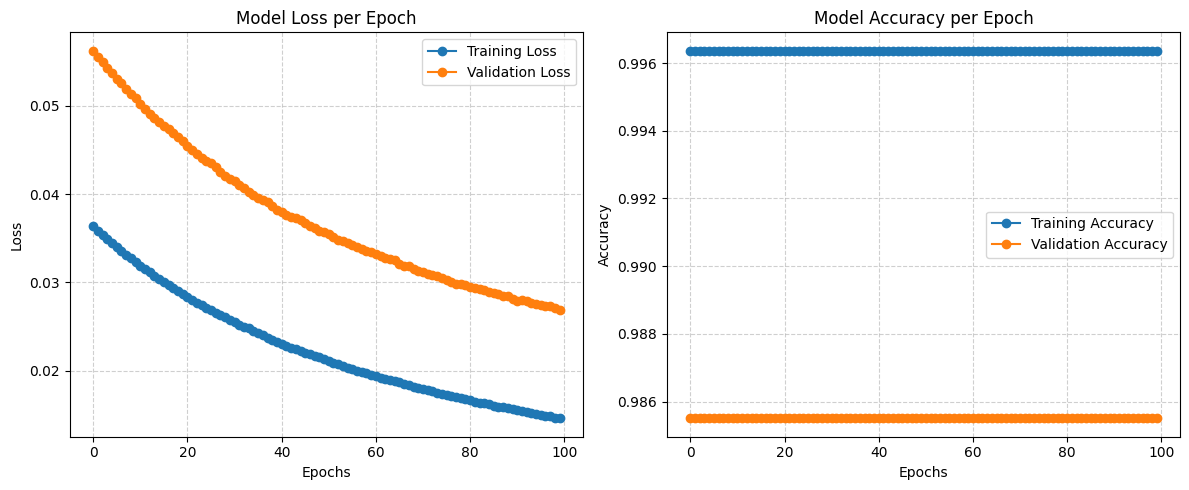

In [35]:
import matplotlib.pyplot as plt

history = model.fit(X_train_np, y_train_np, validation_data=(X_test_np, y_test_np), epochs=100, batch_size=32)

# -----------------------------
# Plot Training & Validation Loss and Accuracy
# -----------------------------
plt.figure(figsize=(12,5))

# Plot Loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Training Loss", marker="o")
plt.plot(history.history["val_loss"], label="Validation Loss", marker="o")
plt.title("Model Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Plot Accuracy (if available)
if "accuracy" in history.history:
    plt.subplot(1,2,2)
    plt.plot(history.history["accuracy"], label="Training Accuracy", marker="o")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy", marker="o")
    plt.title("Model Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()
